# Find Teleconnections (precursor regions) via correlation maps 

In [ ]:
import os
from RGCPD import functions_pp, core_pp
from RGCPD.class_RGCPD import RGCPD
from RGCPD.class_BivariateMI import BivariateMI
from IPython.display import Image
import numpy as np
import pandas as pd

Caveat! The preprocessed data must be put in the folder:<br>
- ....path/observational/raw/preprocessed/era5_sst_1959-2021_1jan_31dec_daily_2.0deg.nc

In [3]:
# path to the data
path_obs_data = '/your_path_to/observational/'

target = core_pp.import_ds_lazy(os.path.join(path_obs_data, 'chrips_1981-2021_target_new.nc'))
hoa_mask = core_pp.import_ds_lazy(os.path.join(path_obs_data, 'chirps_hoa_dry_mask_0.25deg_new.nc'))

target = target.drop_dims('dayofyear')

df_target = target.to_dataframe()[['spatial_mean_raw']]

list_of_name_path = [('', df_target),
                    ('sst', os.path.join(path_obs_data, 'raw', 'era5_sst_1959-2021_1_12_daily_2.0deg.nc'))]

# define analysis:
list_for_MI = [BivariateMI(name='sst', 
                           alpha=.01, FDR_control=True, lags=np.array([1]), 
                           distance_eps=700, min_area_in_degrees2=5)]

# Time-handling subseasonal mode
4-week (28 day) mean periods that fall within OND period

In [4]:
rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           tfreq=28, # <- subseasonal forecasting mode, all data will be aggregated to 10-day means
           start_end_TVdate=('10-01', '12-31'), # <- defining target period 
           start_end_year=(1981, 2021),
           path_outmain='./output_lorentz')

In [5]:
rg.pp_precursors(detrend=True, anomaly=True, selbox=None)

Loaded pre-processed data of sst



Option for pp_precursors to vary pre-processing of datasets by given a list as an argument:
An example: detrend=[True, {'sm1':False, 'sm2':False}]. This input means that default argument is True, except the variables sm1 and sm2 got a different argument. The precursor names sm1 and sm2 should refer to the names given in list_of_name_path.

### Post-processing Target Variable

Start linear detrending ...
Done
Visual test on 0th observationusing absolute anomalies w.r.t. climatology of smoothed concurrent day accross years
original tfreq of imported response variable is converted to desired 28 (daily) means


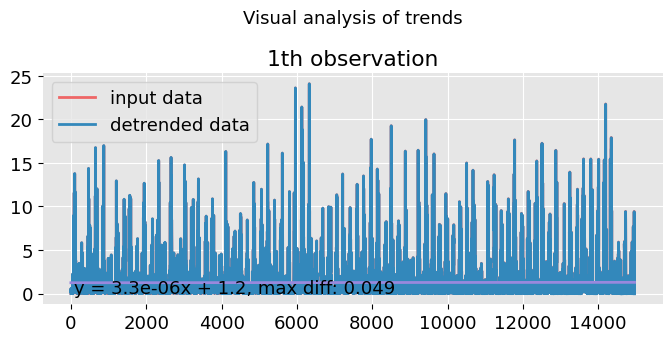

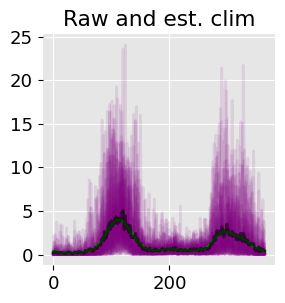

In [6]:
rg.pp_TV(detrend=True, anomaly=True)

In [7]:
rg.df_fullts

,spatial_mean_raw
1981-01-16,-0.112610
1981-02-13,0.034485
1981-03-13,1.793769
1981-04-10,3.000695
1981-05-08,0.295721
...,...
2021-08-28,-0.100138
2021-09-25,-0.040325
2021-10-23,-1.570205
2021-11-20,-0.787996


In [7]:
rg.traintest(method='leave_10', gap_prior=1, gap_after=1, seed=2)
# rg._get_testyrs()[0] # see test years

In [8]:
rg.calc_corr_maps() 


sst - calculating correlation maps
Progress traintest set 100%, trainsize=(90dp, 73%)



Plotting sst
Plotting Corr maps sst, split 0, lag 1


/home/yangliu/miniconda3/envs/RGCPD/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


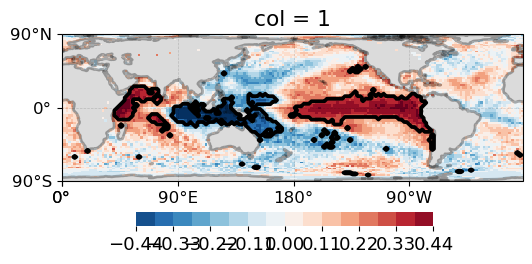

In [9]:
rg.plot_maps_corr()

In [10]:
rg.cluster_list_MI()

Plotting Corr maps sst_labels_init, split 0, lag 1


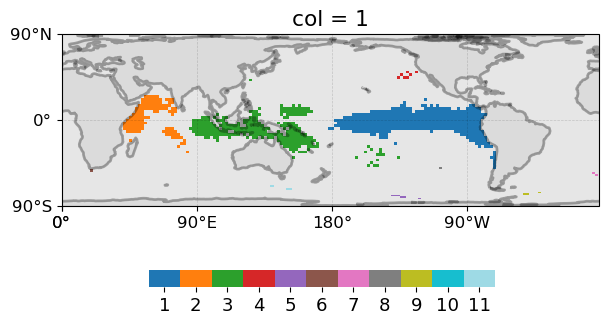

In [11]:
rg.quick_view_labels(mean=True)

In [12]:
rg.get_ts_prec()


Getting MI timeseries
There are [11, 9, 10, 12] regions in total (list of different splits)


From the correlation (BivariateMI) map, the timeseries are named according the format:
{lag}..{region label}..{precursor name}, where precursor name is defined in list_of_name_path. 

In [13]:
rg.df_data

spatial_mean_raw  1..1..sst  1..2..sst  1..3..sst  1..4..sst  \
0 1981-01-16         -0.112610  -0.781289   0.026348  -0.154820   0.398731   
  1981-02-13          0.034485  -0.805915  -0.042760  -0.138640   0.388029   
  1981-03-13          1.793769  -0.455521   0.062720  -0.190565   0.256821   
  1981-04-10          3.000695  -0.359189  -0.090819  -0.097247  -0.001068   
  1981-05-08          0.295721  -0.184985   0.086693   0.043705   0.020359   
...                        ...        ...        ...        ...        ...   
3 2021-08-28         -0.100138  -0.329805   0.077558   0.469274   0.010437   
  2021-09-25         -0.040325  -0.477806  -0.212942   0.392571  -0.120627   
  2021-10-23         -1.570205  -0.698522  -0.157014   0.562189  -0.398112   
  2021-11-20         -0.787996  -0.851767  -0.052099   0.505736  -0.028306   
  2021-12-18          0.702164  -1.010576   0.108792   0.350579  -0.017447   

              1..5..sst  1..6..sst  1..7..sst  1..8..sst  1..9..sst  \
0 1981-01-16   0.217529  -0.324348  -0.197452   0.262071   0.140344   
  1981-02-13   0.218031  -0.454347  -0.198092   0.469227   0.005216   
  1981-03-13   0.282002  -0.301338   0.080340   0.973964   0.072171   
  1981-04-10   0.264594   0.154570  -0.291145   0.091206   0.165278   
  1981-05-08   0.546930  -0.133687   0.027764   0.213893   0.207878   
...                 ...        ...        ...        ...        ...   
3 2021-08-28  -0.037178  -0.148478  -0.545841   0.213701   0.252842   
  2021-09-25  -0.076690   0.619060  -0.503744   0.175116   0.236407   
  2021-10-23  -0.166230   0.483450  -0.294653   0.214721   0.269690   
  2021-11-20  -0.183940   0.084807  -0.186713   0.686340   0.186386   
  2021-12-18  -0.189531  -0.609287   0.359545   0.470682  -0.014510   

              1..11..sst  1..12..sst  1..10..sst  TrainIsTrue  RV_mask  
0 1981-01-16    0.012956    0.006317         NaN            0    False  
  1981-02-13   -0.014150   -0.022728         NaN            0    False  
  1981-03-13    0.055092    0.047149         NaN            0    False  
  1981-04-10    0.014397    0.045278         NaN            0    False  
  1981-05-08    0.106212    0.058237         NaN            0    False  
...                  ...         ...         ...          ...      ...  
3 2021-08-28    0.273744   -0.178296    0.029111            0    False  
  2021-09-25    0.235054   -0.498800   -0.245006            0    False  
  2021-10-23    0.312896   -0.061752   -0.500611            0     True  
  2021-11-20    0.192972    0.055461   -0.330819            0     True  
  2021-12-18   -0.081413    0.066767   -0.392211            0     True  

[2132 rows x 15 columns]

## Train-test cross-validation and Response Variable mask handling

- The different train-test folds are organized in the first level index.
- Each fold contains precursor timeseries that were extracted from only training data.
- The Training data is specified by the TrainIsTrue mask.
- The Response Variable mask defined the dates to predict 
- The RV_mask the anker for lag shifting the precursors.

The last two columns should be always present. 
- The RV_mask is defined by the start_end_TVdate.
- The TrainIsTrue is defined by the method for cross-validation.


In [14]:
# Example lag shifting
from RGCPD.forecasting import func_models as fc_utils
fc_utils.apply_shift_lag(rg.df_splits.loc[0].copy(), lag_i=1)

,TrainIsTrue,x_fit,y_fit,x_pred,y_pred
1981-01-16,0,False,False,False,False
1981-02-13,0,False,False,False,False
1981-03-13,0,False,False,False,False
1981-04-10,0,False,False,False,False
1981-05-08,0,False,False,False,False
...,...,...,...,...,...
2021-08-28,1,False,False,False,False
2021-09-25,1,True,False,True,False
2021-10-23,1,True,True,True,True
2021-11-20,1,True,True,True,True


# Forecasting pipeline

In [15]:
from RGCPD.forecasting import func_models as fc_utils
from RGCPD.forecasting.stat_models_cont import ScikitModel
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV


# choose type prediciton (continuous or probabilistic) by making comment #
prediction = 'continuous'   
prediction = 'events' ; q = .33 # quantile threshold for event definition

if prediction == 'continuous':
    model = ScikitModel(Ridge, verbosity=0)
    # You can also tune parameters by passing a list of values. Then GridSearchCV from sklearn will 
    # find the set of parameters that give the best mean score on all kfold test sets. 
    # below we pass a list of alpha's to tune the regularization.
    alphas = list(np.concatenate([[1E-20],np.logspace(-5,0, 6), np.logspace(.01, 2.5, num=25)]))                       
    kwrgs_model = {'scoringCV':'neg_mean_absolute_error',
                   'kfold':5,
                   'alpha':alphas} # large a, strong regul.
elif prediction == 'events':
    model = ScikitModel(LogisticRegressionCV, verbosity=0)
    kwrgs_model = {'kfold':5,
                   'scoring':'neg_brier_score'}

    

target_ts = rg.TV.RV_ts ; 
target_ts = (target_ts - target_ts.mean()) / target_ts.std()
if prediction == 'events':
    if q >= 0.5:
        target_ts = (target_ts > target_ts.quantile(q)).astype(int)
    elif q < .5:
        target_ts = (target_ts < target_ts.quantile(q)).astype(int)
    BSS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).BSS
    score_func_list = [BSS, fc_utils.metrics.roc_auc_score]
    
elif prediction == 'continuous':
    RMSE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).RMSE
    MAE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).MAE
    score_func_list = [RMSE_SS, fc_utils.corrcoef, MAE_SS]
        
    
out = rg.fit_df_data_ridge(target=target_ts,
                           keys=None,
                           fcmodel=model,
                           kwrgs_model=kwrgs_model,
                           transformer=fc_utils.standardize_on_train,
                           tau_min=1, tau_max=3)
predict, weights, model_lags = out

df_train_m, df_test_s_m, df_test_m, df_boot = fc_utils.get_scores(predict,
                                                                 rg.df_data.iloc[:,-2:],
                                                                 score_func_list,
                                                                 n_boot = 100,
                                                                 score_per_test=False,
                                                                 blocksize=1,
                                                                 rng_seed=1)
lag = 1
if prediction == 'events':
    print(model.scikitmodel.__name__, '\n', f'Test score at lag {lag}\n',
          'BSS {:.2f}\n'.format(df_test_m.loc[0].loc[lag].loc['BSS']),
          'AUC {:.2f}'.format(df_test_m.loc[0].loc[lag].loc['roc_auc_score']),
          '\nTrain score\n',
          'BSS {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['BSS']),
          'AUC {:.2f}'.format(df_train_m.mean(0).loc[lag]['roc_auc_score']))
elif prediction == 'continuous':
    print(model.scikitmodel.__name__, '\n', 'Test score\n',
              'RMSE {:.2f}\n'.format(df_test_m.loc[0][lag]['RMSE']),
              'MAE {:.2f}\n'.format(df_test_m.loc[0][lag]['MAE']),
              'corrcoef {:.2f}'.format(df_test_m.loc[0][lag]['corrcoef']),
              '\nTrain score\n',
              'RMSE {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['RMSE']),
              'MAE {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['MAE']),
              'corrcoef {:.2f}'.format(df_train_m.mean(0).loc[lag]['corrcoef']))

LogisticRegressionCV 
 Test score at lag 1
 BSS 0.08
 AUC 0.66 
Train score
 BSS 0.26
 AUC 0.82


In [16]:
import RGCPD.save
from pathlib import Path
# create an output folder
output_folder = Path(path_obs_data) / 'output'
output_folder.mkdir(parents=True, exist_ok=True)
print(f"Directory {output_folder} is created")

model_name = model.scikitmodel.__name__

# save scores
for df, name in zip([df_train_m, df_test_s_m, df_test_m, df_boot], ["train_m", "test_s_m", "test_m", "boot"]):
    df_file_name = output_folder / f'{model_name}_{name}.csv'
    RGCPD.save.save_scores(df_file_name, df)

#save ML model 
for lag, value in model_lags.items():
    for split, sklearn_model in value.items():
        onnx_model_filename = output_folder / f'{model_name}_{lag}_{split}.onnx'
        RGCPD.save.save_model(onnx_model_filename, sklearn_model)

1                       2                       3              
        BSS roc_auc_score       BSS roc_auc_score       BSS roc_auc_score
0  0.080021      0.660024  0.003725      0.511005 -0.034769      0.494051

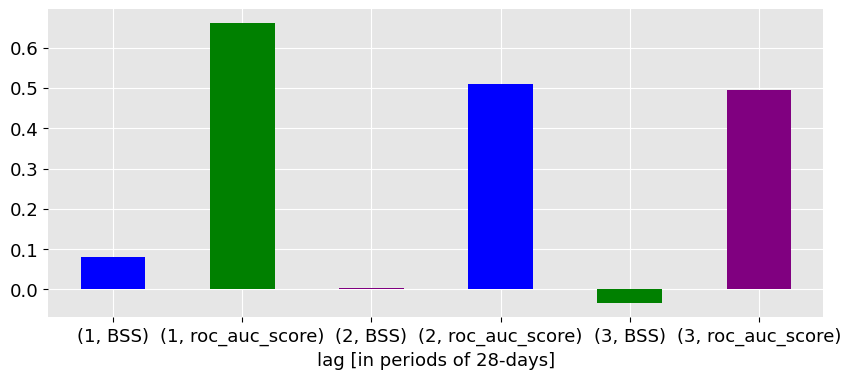

In [16]:
ax = df_test_m.loc[0].plot.bar(rot=0, color=['blue', 'green', 'purple'], figsize=(10,4))
ax.set_xlabel('lag [in periods of 28-days]')
df_test_m

/home/yangliu/miniconda3/envs/RGCPD/lib/python3.8/site-packages/seaborn/categorical.py:3021: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


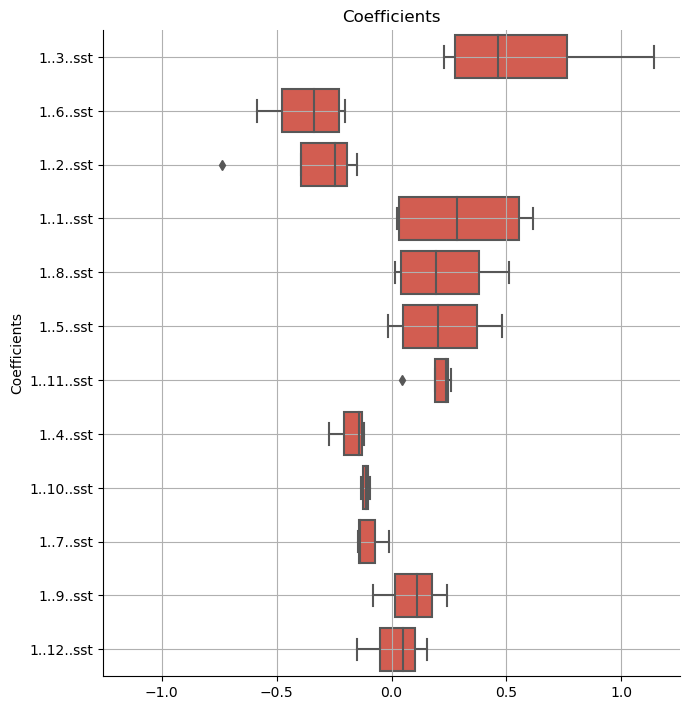

In [17]:
from RGCPD.forecasting.stat_models import plot_importances
coeff, fig = plot_importances(models_splits_lags=model_lags, lag=1)
fig

## Causal Discovery using Tigramite

In [ ]:
rg.PCMCI_df_data(tigr_function_call='run_pcmci',
                 kwrgs_tigr={'tau_min': 0,
                             'tau_max': 1,
                             'pc_alpha': 0.05,
                             'max_conds_dim': 2,
                             'max_combinations': 2,
                             'max_conds_py': 2,
                             'max_conds_px': 2})

In [ ]:
rg.PCMCI_get_links(var=rg.TV.name, alpha_level=.05, FDR_cv=False)
rg.df_links

In [ ]:
# on the left you see all the extraction precursor regions, on the right you see the regions which were found Conditionally Dependent (~Causal)
rg.plot_maps_sum()